In [45]:
## Calculating and plotting intensity profile propagated large relative to (Zr=10, far-field 100m)
#--------------------------------------------------------------------------------------------------------
#q param. goes from i(10) -> i(10+100) 
#evaluate HG modes again at new q-param. and add together. 
#basis described by waist size (w0) and waist location into q parameter (q(z)=i*Zr+z-z0=q0+z-z0, q0=i*Zr)
#w(z) spot size - radius at which intensity is 1/e**2 max intensity I(0)
#========================================================================================================

## IMPORTS:

# Math imports
from math import pi, log, exp, sin, cos, atan, sqrt, e, inf, factorial, radians, degrees
from scipy.special import jn
from numpy.polynomial.hermite import hermval
from scipy import integrate
from array import *
import operator
import cmath
import numpy as np
# Plot imports
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#--------------------------------------------------------------------------------------------------------
## CONSTANTS :


wavelength = 1064e-9     #Wavelength = 1064 nm
k = 2*pi /( wavelength ) #Wavenumber
W0 = 0.001 #Beam waist size, Virgo uses w0=0.02m intensity patterns for reference
z0=0
z=100
#Zr=pi*W0*W0/ wavelength 
Zr=10 #Rayleigh range (approx. length of near-field region), im. part of q-param.
# Hardcoded order.. e.g., TEM10 is n=1 and m=0.
nMax=3
mMax=3
q0=(1j) * Zr

# Enter modes as 2d grid (n,m) of coefficients
cols=mMax+1
rows=nMax+1
modes = [[0 for m in range(cols)] for n in range(rows)]

# Enter mode coefficients
modes[0][0]=0
modes[1][0]=1



def showGrid():  
    colList=[]

    for m in range(cols):
         colList.append(m)
    print("n\m " + str(colList))

    for n in range(rows):
        List=[]     
        for m in range(cols):
            List.append(modes[n][m])
            if m==cols-1:
                print(str(n) +"   " + str(List))
            
showGrid()

### Get coefficients of each mode (e.g. c0*H0(x), c1*H1(y)...)
#def getCoeff(mode, modestr):
#    str_arr = input("Enter " + modestr +" coefficients(c0*H0 c1*H1 c2*H2..): ").strip().split(' ') 
#    arr = [float(num) for num in str_arr]
#    return arr

##get mode (assuming a single mode each n and m)
#def getModes(carr):
#    count = 0
#    for i in carr: 
#        count+=1
#        if i==1:
#            return count-1
#            return 0
        
#carrN = getCoeff(n,"n")
#carrM = getCoeff(m,"m")

#n=getModes(carrN)
#m=getModes(carrM)
#order=n+m
#--------------------------------------------------------------------------------------------------------
## CHARACTERISTIC VARIABLES:

## Desc change in the radius of curvature (Rc)
def Rc(z) :
    #r=z-z0+(Zr**2/(z-z0))
    
    if z==0:
        r=inf
    else :
        r=z*(1 + ( Zr / z )**2)
    return (r)



## Gouy phase
def GouyPhase(z,order) :
    PhaseLag=(order+1)*atan(z/Zr)
    Gouy=atan((z-z0)/Zr)
    return(PhaseLag)

## Spot size
def w(z):
    w=W0*sqrt(1+(z/Zr)**2)
    return(w)

## q-parameter
def q(z):
    q=q0+z-z0
    return(q)

#--------------------------------------------------------------------------------------------------------
## INTENSITY CALCULATION:
# Using Eq. (9.26), LR article

## Intensity
#def Amplitude(x,y,z) :

#    carrN=[0,1]
       #     print(carrN)
#    n=0
#    m=0
#    carrM=[0,1]
       #     print(carrM)

#    order=2

#    Unm = (2 ** (order - 1) * factorial(n) * factorial(m) * pi) ** (-1 / 2) *\
#    (1 / w(z)) * e ** ((1j) * (order + 1) * GouyPhase(z,order)) *\
#    e ** (-(1j) * (k * (x ** 2 + y ** 2) / (2 * Rc(z))) - ((x ** 2 + y ** 2) / (w(z) ** 2))) *\
#    HermPol(n, x, carrN) *\
#    HermPol(m, y, carrM)

          
#    return(Unm)

## Intensity
def Amplitude(x,y,z) :

    UnmSum=0
   
    for n in range(rows):
        for m in range(cols):
            carrN=[0] * rows
            carrN[n]=modes[n][m]
       #     print(carrN)

            carrM=[0] * cols
            carrM[m]=modes[n][m]
       #     print(carrM)

            order=n+m

            Unm = (2 ** (order - 1) * factorial(n) * factorial(m) * pi) ** (-1 / 2) *\
            (1 / w(z)) * e ** ((1j) * (order + 1) * GouyPhase(z,order)) *\
            e ** (-(1j) * (k * (x ** 2 + y ** 2) / (2 * Rc(z))) - ((x ** 2 + y ** 2) / (w(z) ** 2))) *\
            HermPol(n, x, carrN) *\
            HermPol(m, y, carrM)

            UnmSum+=Unm
          
    return(UnmSum)


### Intensity from q-parameter
def Amplitude2(x,y,z) :

    UnmSum=0
   
    for n in range(rows):
        for m in range(cols):
            carrN=[0] * rows
            carrN[n]=modes[n][m]

            carrM=[0] * cols
            carrM[m]=modes[n][m]

            order=n+m
            
            Unm = (2/pi)**1/4 * \
            cmath.sqrt( 1 / (2**n * factorial(n) * W0) ) * \
            cmath.sqrt( q0 / q(z) ) * \
            ( ( q0 * np.conjugate(q(z)) ) / ( np.conjugate(q0) * q(z) ) )**n/2 * \
            HermPol(n, x, carrN) * \
            cmath.exp( (-( (1j) * k * x**2 )/( 2 * q(z))) ) * \
            (2/pi)**1/4 * \
            cmath.sqrt( 1 / (2**m * factorial(m) * W0) ) * \
            cmath.sqrt(q0 / q(z) ) * \
            ( ( q0 * np.conjugate(q(z) ) )/ ( np.conjugate(q0) * q(z) ) )**m/2 * \
            HermPol(m, y, carrM) * \
            cmath.exp( (-( (1j) * k * y**2 )/( 2 * q(z))) )

            UnmSum+=Unm
        
        
    
    return((UnmSum))

#Get herm polys from modes
def HermPol(mode, coord, carr):
   
    herm = hermval(coord*sqrt(2)/w(z),carr)
    return herm

#-------------------------------------------------------------------------------------------------------
## PHASE: 
def Phase(x,y,z):
    return degrees(cmath.phase(Amplitude(x,y,z)))

def Phase2(x,y,z):
    return degrees(cmath.phase(Amplitude2(x,y,z)))

#--------------------------------------------------------------------------------------------------------
## 3D PLOT:

def IntensityPlot(z):
# Get data
    x = np.arange(-.03, .03, 0.001)
    y = np.arange(-.03, .03, 0.001)
    x, y = np.meshgrid(x, y)
    f = np.vectorize(Amplitude)
## Make the plot, amp. rather than int.
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_surface(x, y, abs(f(0,y,z))**2, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none');
# Labels and render
    plt.xlabel("x")
    plt.ylabel("y");
    ax.set_zlabel("Intensity")
   # plt.title('Intensity Profile HG Modes n,m=' + str(carrN) + "," + str(carrM))
    plt.show()
    
def IntensitySlice(z):
    x = np.arange(-.003, .003, 0.00001)
    y = 0.0
    f=Amplitude(x,y,z)
    fig=plt.figure()
    plt.semilogy(x,f**2)
    plt.xlabel('x')
    plt.ylabel('Intensity')
    plt.grid()
    #plt.savefig('IntCheck.pdf')

def IntensityPlot2(z):
# Get data
    x = np.arange(-.03, .03, 0.001)
    y = np.arange(-.03, .03, 0.001)
    x, y = np.meshgrid(x, y)
    f2 = np.vectorize(Amplitude2)
## Make the plot, amp. rather than int.
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_surface(x, y, abs(f2(0,y,z))**2, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none');
# Labels and render
    plt.xlabel("x")
    plt.ylabel("y");
    ax.set_zlabel("Intensity")
   # plt.title('Intensity Profile HG Modes n,m=' + str(carrN) + "," + str(carrM))
    plt.show()

#--------------------------------------------------------------------------------------------------------
## 2D PLOT

def AmpPlot(z):
   
# Get data
    x = np.arange(-.03, .03, 0.001)
    y = np.arange(-.03, .03, 0.001)
    x, y = np.meshgrid(x, y)
    f = np.vectorize(Amplitude)
## Make the plot, amp. rather than int.
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_surface(x, y, f, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none');
# Labels and render
    plt.xlabel("x")
    plt.ylabel("y");
    ax.set_zlabel("Amplitude")
   # plt.title('Intensity Profile HG Modes n,m=' + str(carrN) + "," + str(carrM))
    plt.show()
    
def AmpPlot2(z):
   
# Get data
    x = np.arange(-.03, .03, 0.001)
    y = np.arange(-.03, .03, 0.001)
    x, y = np.meshgrid(x, y)
    f = np.vectorize(Amplitude)
## Make the plot, amp. rather than int.
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_surface(x, y, f, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none');
# Labels and render
    plt.xlabel("x")
    plt.ylabel("y");
    ax.set_zlabel("Amplitude")
   # plt.title('Intensity Profile HG Modes n,m=' + str(carrN) + "," + str(carrM))
    plt.show()
    
#--------------------------------------------------------------------------------------------------------
## Phase Map
def PhaseMap(z):
   
# Get data
    x = np.arange(-.003, .003, 0.00001)
    y = np.arange(-.003, .003, 0.00001)
    x, y = np.meshgrid(x, y)
    f = np.vectorize(Phase)
## Make the plot, amp. rather than int.
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_surface(x, y, f(x,y,z), rstride=1, cstride=1,
               cmap='viridis', edgecolor='none');
# Labels and render
    plt.xlabel("x")
    plt.ylabel("y");
    ax.set_zlabel("deg.")
   # plt.title('Intensity Profile HG Modes n,m=' + str(carrN) + "," + str(carrM))
    plt.show()

def PhaseMap2(z):
   
# Get data
    x = np.arange(-.003, .003, 0.00001)
    y = np.arange(-.003, .003, 0.00001)
    x, y = np.meshgrid(x, y)
    f = np.vectorize(Phase2)
## Make the plot, amp. rather than int.
    fig = plt.figure()
    ax = Axes3D(fig)

    ax.plot_surface(x, y, f(x,y,z), rstride=1, cstride=1,
               cmap='viridis', edgecolor='none');
# Labels and render
    plt.xlabel("x")
    plt.ylabel("y");
    ax.set_zlabel("deg.")
   # plt.title('Intensity Profile HG Modes n,m=' + str(carrN) + "," + str(carrM))
    plt.show()    
    
#=========================================================================================================
#def main():
    
#main()
#=========================================================================================================

##END




n\m [0, 1, 2, 3]
0   [0, 0, 0, 0]
1   [1, 0, 0, 0]
2   [0, 0, 0, 0]
3   [0, 0, 0, 0]


In [46]:
print(Phase(0,0,10))
print(Phase(0,0,100))
print(Phase2(0,0,10))
print(Phase2(0,0,100))

0.0
0.0
0.0
0.0


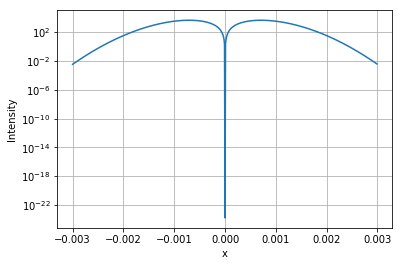

In [47]:
#IntensityPlot(50)
#IntensityPlot2(50)
IntensitySlice(0)


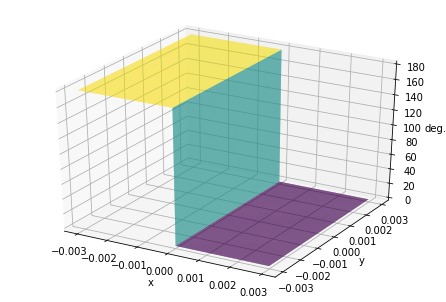

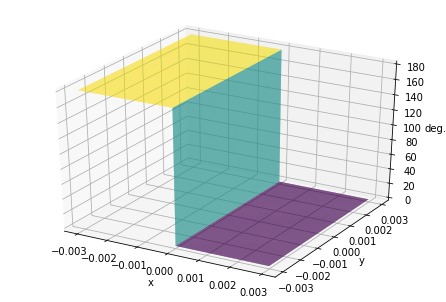

In [49]:
PhaseMap(0)
PhaseMap2(0)